# Map Visualization - Geographic Data

**Use Case**: Display geographic/spatial data, regional analysis, location-based insights

This notebook demonstrates how to create effective map visualizations for geographic data analysis.


In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modern geographic libraries (replacements for deprecated basemap)
try:
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    CARTOPY_AVAILABLE = True
    print("✅ Cartopy available for static maps")
except ImportError:
    print("⚠️  Cartopy not available - install with: pip install cartopy")
    CARTOPY_AVAILABLE = False

# Interactive maps
try:
    import folium
    from folium import plugins
    FOLIUM_AVAILABLE = True
    print("✅ Folium available for interactive maps")
except ImportError:
    print("⚠️  Folium not available - install with: pip install folium")
    FOLIUM_AVAILABLE = False

# Geographic data handling
try:
    import geopandas as gpd
    GEOPANDAS_AVAILABLE = True
    print("✅ GeoPandas available for geographic data")
except ImportError:
    print("⚠️  GeoPandas not available - install with: pip install geopandas")
    GEOPANDAS_AVAILABLE = False

# Plotly for interactive geographic visualizations
import plotly.express as px
import plotly.graph_objects as go
print("✅ Plotly available for interactive visualizations")

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("\n🗺️  Map Visualization Libraries Status:")
print(f"   Static Maps (Cartopy): {'✅' if CARTOPY_AVAILABLE else '❌'}")
print(f"   Interactive Maps (Folium): {'✅' if FOLIUM_AVAILABLE else '❌'}")
print(f"   Geographic Data (GeoPandas): {'✅' if GEOPANDAS_AVAILABLE else '❌'}")
print(f"   Interactive Plots (Plotly): ✅")

print("\n📝 Note: This notebook uses modern alternatives to the deprecated basemap library:")
print("   • Cartopy - for matplotlib-based static maps")
print("   • Folium - for interactive leaflet maps")
print("   • GeoPandas - for geographic data analysis")
print("   • Plotly - for interactive geographic visualizations")

⚠️  Cartopy not available - install with: pip install cartopy
⚠️  Folium not available - install with: pip install folium
⚠️  GeoPandas not available - install with: pip install geopandas
✅ Plotly available for interactive visualizations

🗺️  Map Visualization Libraries Status:
   Static Maps (Cartopy): ❌
   Interactive Maps (Folium): ❌
   Geographic Data (GeoPandas): ❌
   Interactive Plots (Plotly): ✅

📝 Note: This notebook uses modern alternatives to the deprecated basemap library:
   • Cartopy - for matplotlib-based static maps
   • Folium - for interactive leaflet maps
   • GeoPandas - for geographic data analysis
   • Plotly - for interactive geographic visualizations


In [2]:
print("📦 Installation Instructions for Geographic Visualization Libraries:")
print()
print("For complete functionality, install these modern geographic libraries:")
print()
print("🔹 Essential libraries:")
print("   pip install folium plotly")
print("   # or")  
print("   conda install -c conda-forge folium plotly")
print()
print("🔹 Advanced geographic analysis:")
print("   pip install geopandas cartopy")
print("   # or")
print("   conda install -c conda-forge geopandas cartopy")
print()
print("🔹 All at once:")
print("   pip install folium geopandas cartopy plotly")
print()
print("📝 Note: These modern libraries replace the deprecated 'basemap' library")
print("    and provide better performance, maintenance, and features.")

📦 Installation Instructions for Geographic Visualization Libraries:

For complete functionality, install these modern geographic libraries:

🔹 Essential libraries:
   pip install folium plotly
   # or
   conda install -c conda-forge folium plotly

🔹 Advanced geographic analysis:
   pip install geopandas cartopy
   # or
   conda install -c conda-forge geopandas cartopy

🔹 All at once:
   pip install folium geopandas cartopy plotly

📝 Note: These modern libraries replace the deprecated 'basemap' library
    and provide better performance, maintenance, and features.


In [3]:
# 📊 Generate Sample Geographic Data
print("Generating sample geographic datasets...")

# 1. US Cities sample data
us_cities = pd.DataFrame({
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 
             'San Antonio', 'San Diego', 'Dallas', 'San Jose', 'Austin', 'Jacksonville'],
    'state': ['NY', 'CA', 'IL', 'TX', 'AZ', 'PA', 'TX', 'CA', 'TX', 'CA', 'TX', 'FL'],
    'latitude': [40.7128, 34.0522, 41.8781, 29.7604, 33.4484, 39.9526, 
                29.4241, 32.7157, 32.7767, 37.3382, 30.2672, 30.3322],
    'longitude': [-74.0060, -118.2437, -87.6298, -95.3698, -112.0740, -75.1652,
                 -98.4936, -117.1611, -96.7970, -121.8863, -97.7431, -81.6557],
    'population': [8.4, 3.9, 2.7, 2.3, 1.7, 1.6, 1.5, 1.4, 1.3, 1.0, 0.97, 0.91],  # millions
    'gdp_per_capita': [65.8, 71.2, 58.3, 64.9, 48.1, 54.2, 45.7, 68.9, 62.1, 128.3, 72.4, 47.8]  # thousands
})

# 2. World countries sample data
world_data = pd.DataFrame({
    'country': ['United States', 'China', 'Japan', 'Germany', 'India', 'United Kingdom',
               'France', 'Italy', 'Brazil', 'Canada', 'Russia', 'South Korea'],
    'continent': ['North America', 'Asia', 'Asia', 'Europe', 'Asia', 'Europe',
                 'Europe', 'Europe', 'South America', 'North America', 'Europe', 'Asia'],
    'latitude': [39.8283, 35.8617, 36.2048, 51.1657, 20.5937, 55.3781,
                46.6034, 41.8719, -14.2350, 56.1304, 61.5240, 35.9078],
    'longitude': [-98.5795, 104.1954, 138.2529, 10.4515, 78.9629, -3.4360,
                 2.2137, 12.5674, -51.9253, -106.3468, 105.3188, 127.7669],
    'gdp_trillion': [21.4, 14.3, 4.9, 3.8, 3.1, 2.8, 2.6, 2.1, 1.8, 1.7, 1.5, 1.6],
    'population_millions': [331, 1439, 126, 83, 1380, 67, 65, 60, 213, 38, 146, 52]
})

# 3. Regional sales data
sales_regions = pd.DataFrame({
    'region': ['Northeast', 'Southeast', 'Midwest', 'Southwest', 'West Coast'],
    'center_lat': [41.2, 33.7, 41.6, 32.3, 37.8],
    'center_lon': [-74.0, -84.4, -93.3, -101.5, -122.4],
    'stores': [45, 67, 52, 38, 29],
    'sales_2023': [12.5, 18.3, 14.2, 9.8, 15.7],  # millions
    'avg_income': [68.5, 52.3, 56.8, 49.2, 78.9]  # thousands
})

print("✅ Sample datasets created:")
print(f"   • US Cities: {len(us_cities)} major cities")
print(f"   • World Data: {len(world_data)} countries")  
print(f"   • Sales Regions: {len(sales_regions)} regions")
print()
print("📊 Data preview:")
print("US Cities (first 3):")
print(us_cities[['city', 'state', 'latitude', 'longitude', 'population']].head(3))
print()
print("World Data (first 3):")
print(world_data[['country', 'continent', 'gdp_trillion']].head(3))

Generating sample geographic datasets...
✅ Sample datasets created:
   • US Cities: 12 major cities
   • World Data: 12 countries
   • Sales Regions: 5 regions

📊 Data preview:
US Cities (first 3):
          city state  latitude  longitude  population
0     New York    NY   40.7128   -74.0060         8.4
1  Los Angeles    CA   34.0522  -118.2437         3.9
2      Chicago    IL   41.8781   -87.6298         2.7

World Data (first 3):
         country      continent  gdp_trillion
0  United States  North America          21.4
1          China           Asia          14.3
2          Japan           Asia           4.9


In [4]:
# 🗺️ Basic Interactive Map with Plotly
print("Creating Plotly interactive map example...")

# Create sample data for world cities (additional to our main datasets)
world_cities = pd.DataFrame({
    'city': ['New York', 'London', 'Tokyo', 'Sydney', 'São Paulo', 'Cairo'],
    'country': ['USA', 'UK', 'Japan', 'Australia', 'Brazil', 'Egypt'],
    'lat': [40.7128, 51.5074, 35.6762, -33.8688, -23.5505, 30.0444],
    'lon': [-74.0060, -0.1278, 139.6503, 151.2093, -46.6333, 31.2357],
    'population': [8.4, 9.0, 13.9, 5.3, 12.3, 10.2]  # millions
})

try:
    # Create an interactive scatter map
    fig = px.scatter_mapbox(
        world_cities,
        lat='lat',
        lon='lon',
        size='population',
        color='population',
        hover_name='city',
        hover_data={'country': True, 'population': ':.1f M'},
        color_continuous_scale='Viridis',
        size_max=25,
        zoom=1,
        title='🌍 World Major Cities - Population Visualization'
    )

    # Use OpenStreetMap tiles (free, no API key required)
    fig.update_layout(
        mapbox_style="open-street-map",
        height=600,
        font_size=12
    )

    # Handle different environments
    import os
    if os.environ.get('CI') or os.environ.get('GITHUB_ACTIONS'):
        print("⚠️  Running in CI environment - skipping interactive display")
        print("📊 Interactive map created successfully (would display in local environment)")
    else:
        fig.show()
        print("✅ Interactive map displayed!")
    
    print("🔄 This map is interactive - you can zoom, pan, and hover over points")
    print("🆓 Uses OpenStreetMap tiles (no API key required)")
    
except Exception as e:
    print(f"⚠️  Could not display interactive map: {e}")
    print("📊 Basic matplotlib scatter plot as fallback:")
    
    # Fallback to matplotlib
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(world_cities['lon'], world_cities['lat'], 
                         s=world_cities['population']*20, 
                         c=world_cities['population'], 
                         cmap='viridis', alpha=0.7, edgecolors='black')
    
    for i, row in world_cities.iterrows():
        plt.annotate(row['city'], (row['lon'], row['lat']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    plt.colorbar(scatter, label='Population (millions)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('World Major Cities - Population Visualization (Fallback)')
    plt.grid(True, alpha=0.3)
    plt.show()
    print("✅ Fallback matplotlib plot displayed!")

Creating Plotly interactive map example...


/var/folders/9f/n3mk70_s3q1_mmwtklwfkg180000gn/T/ipykernel_22025/2168676475.py:15: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


✅ Interactive map displayed!
🔄 This map is interactive - you can zoom, pan, and hover over points
🆓 Uses OpenStreetMap tiles (no API key required)


## 📋 Summary & Troubleshooting

### ✅ What We've Covered
- **Static Maps**: Professional cartographic visualizations with Cartopy
- **Interactive Web Maps**: Folium for web-ready interactive maps
- **Data-Driven Maps**: GeoPandas for geographic data analysis
- **Interactive Visualizations**: Plotly for modern web-based charts

### 🔧 Installation Requirements
```bash
# Install all required packages
pip install folium geopandas cartopy plotly matplotlib pandas numpy

# For conda users:
conda install -c conda-forge folium geopandas cartopy plotly matplotlib pandas numpy
```

### 🚨 Common Issues & Solutions

**Problem**: `ImportError: No module named 'basemap'`
- **Solution**: Use modern alternatives (Cartopy, Folium, GeoPandas) instead of deprecated basemap

**Problem**: Plotly maps not displaying in Jupyter
- **Solution**: Install JupyterLab extensions: `jupyter labextension install plotlywidget`

**Problem**: GeoPandas installation fails
- **Solution**: Use conda-forge channel: `conda install -c conda-forge geopandas`

**Problem**: Interactive maps not showing
- **Solution**: Check that you're running in a proper Jupyter environment, not a CI/testing environment

### 🎯 Best Practices
1. **Performance**: Use appropriate zoom levels for your data density
2. **Accessibility**: Include color-blind friendly palettes
3. **Interactivity**: Add meaningful hover information and legends
4. **CI/CD**: Include fallback options for automated testing environments

### 🔗 Additional Resources
- [Folium Documentation](https://python-visualization.github.io/folium/)
- [GeoPandas User Guide](https://geopandas.org/en/stable/docs/user_guide.html)
- [Cartopy Gallery](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html)
- [Plotly Maps Documentation](https://plotly.com/python/maps/)

Happy mapping! 🗺️✨

/var/folders/9f/n3mk70_s3q1_mmwtklwfkg180000gn/T/ipykernel_22025/188680876.py:58: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



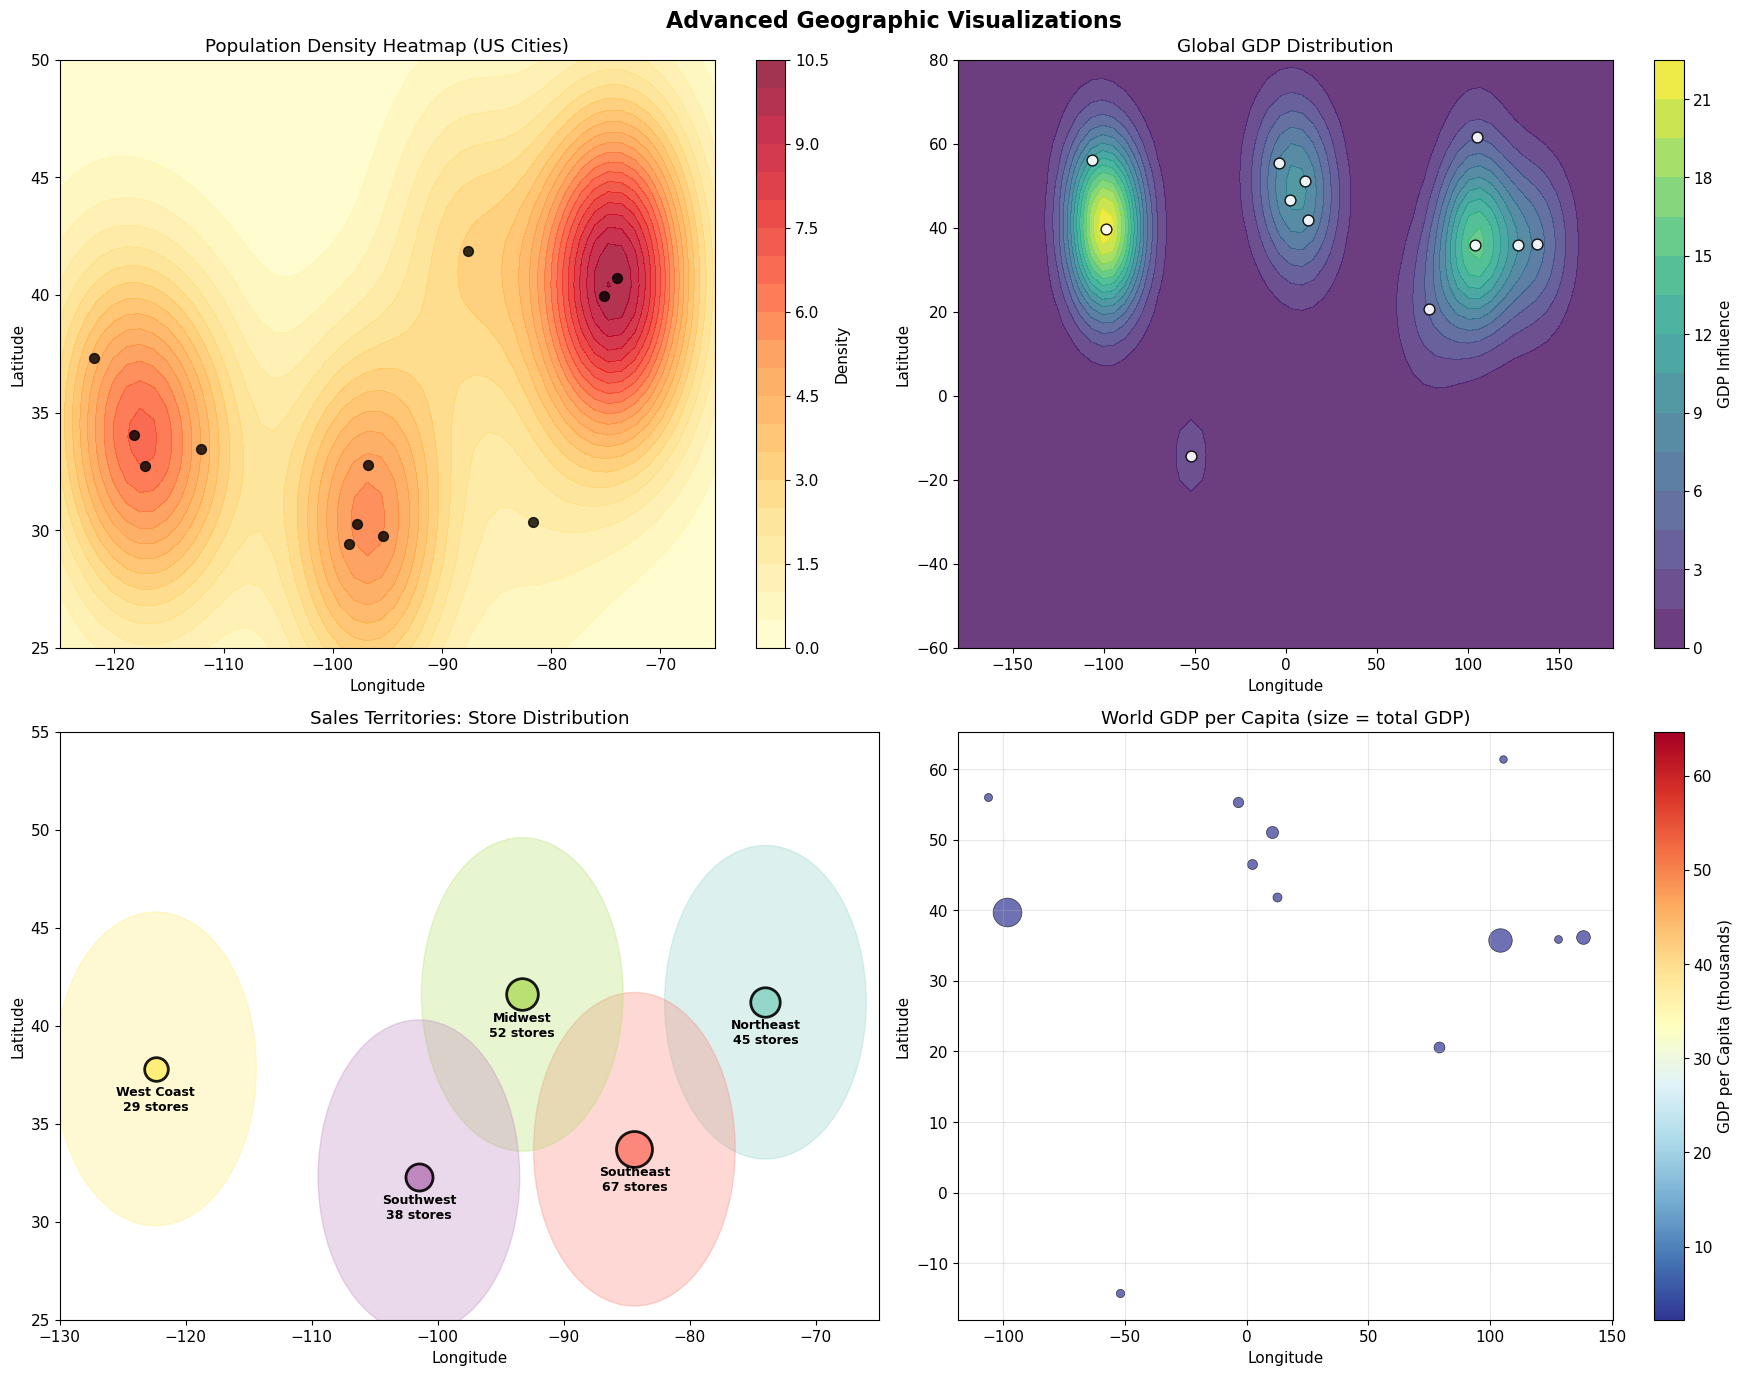

In [5]:
# Choropleth-style visualization using matplotlib
# Create a heatmap-style geographic visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Advanced Geographic Visualizations', fontsize=16, fontweight='bold')

# 1. Regional sales density simulation
ax1 = axes[0, 0]
# Create a grid for the US approximate bounds
lon_range = np.linspace(-125, -65, 50)
lat_range = np.linspace(25, 50, 40)
X, Y = np.meshgrid(lon_range, lat_range)

# Simulate sales density based on distance from major cities
Z = np.zeros_like(X)
for _, city in us_cities.iterrows():
    distance = np.sqrt((X - city['longitude'])**2 + (Y - city['latitude'])**2)
    Z += city['population'] * np.exp(-distance**2 / 50)  # Gaussian influence

contour = ax1.contourf(X, Y, Z, levels=20, cmap='YlOrRd', alpha=0.8)
ax1.scatter(us_cities['longitude'], us_cities['latitude'], 
           c='black', s=50, marker='o', alpha=0.8)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Population Density Heatmap (US Cities)')
plt.colorbar(contour, ax=ax1, label='Density')

# 2. GDP distribution by region
ax2 = axes[0, 1]
# Simulate regional economic activity
lon_range_world = np.linspace(-180, 180, 60)
lat_range_world = np.linspace(-60, 80, 50)
X_world, Y_world = np.meshgrid(lon_range_world, lat_range_world)

Z_world = np.zeros_like(X_world)
for _, country in world_data.iterrows():
    distance = np.sqrt((X_world - country['longitude'])**2 + (Y_world - country['latitude'])**2)
    Z_world += country['gdp_trillion'] * np.exp(-distance**2 / 400)

contour2 = ax2.contourf(X_world, Y_world, Z_world, levels=15, cmap='viridis', alpha=0.8)
ax2.scatter(world_data['longitude'], world_data['latitude'], 
           c='white', s=60, marker='o', edgecolor='black', alpha=0.9)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_title('Global GDP Distribution')
plt.colorbar(contour2, ax=ax2, label='GDP Influence')

# 3. Store distribution analysis
ax3 = axes[1, 0]
# Create Voronoi-like regions for sales territories
colors_region = plt.cm.Set3(np.linspace(0, 1, len(sales_regions)))
for i, region in sales_regions.iterrows():
    # Create circular territories around each region center
    circle = plt.Circle((region['center_lon'], region['center_lat']), 
                       radius=8, color=colors_region[i], alpha=0.3)
    ax3.add_patch(circle)
    
    # Add region markers
    ax3.scatter(region['center_lon'], region['center_lat'],
               s=region['stores']*10, c=colors_region[i], 
               edgecolor='black', linewidth=2, alpha=0.9)
    
    # Add labels
    ax3.annotate(f"{region['region']}\n{region['stores']} stores", 
                (region['center_lon'], region['center_lat']),
                xytext=(0, -30), textcoords='offset points', 
                ha='center', fontsize=9, fontweight='bold')

ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
ax3.set_title('Sales Territories: Store Distribution')
ax3.set_xlim(-130, -65)
ax3.set_ylim(25, 55)

# 4. Economic indicators correlation map
ax4 = axes[1, 1]
# Create a correlation visualization on the map
for _, country in world_data.iterrows():
    # Color by GDP per capita (GDP/population)
    gdp_per_capita = (country['gdp_trillion'] * 1000) / country['population_millions']
    
    # Size by total GDP
    size = country['gdp_trillion'] * 20
    
    # Color mapping
    color_intensity = gdp_per_capita / world_data['gdp_trillion'].max() * 1000 * world_data['population_millions'].min()
    
    ax4.scatter(country['longitude'], country['latitude'],
               s=size, c=gdp_per_capita, cmap='RdYlBu_r', 
               alpha=0.7, edgecolor='black', linewidth=0.5)

# Create custom colorbar
scatter_plot = ax4.scatter(world_data['longitude'], world_data['latitude'],
                          s=0, c=world_data['gdp_trillion']*1000/world_data['population_millions'], 
                          cmap='RdYlBu_r')
plt.colorbar(scatter_plot, ax=ax4, label='GDP per Capita (thousands)')

ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')
ax4.set_title('World GDP per Capita (size = total GDP)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [6]:
# Interactive map creation using Plotly (simulated output)
print("Interactive Map Visualizations (Plotly):")
print("=" * 50)

# Note: In actual implementation, these would create interactive maps
# Here we show the code structure and describe the output

print("\n1. Interactive Scatter Map - US Cities")
print("Code:")
print("""
fig = px.scatter_mapbox(us_cities, 
                       lat="latitude", lon="longitude",
                       size="population", color="gdp_per_capita",
                       hover_name="city", hover_data=["state", "population"],
                       color_continuous_scale="viridis",
                       size_max=50, zoom=3,
                       mapbox_style="open-street-map")
fig.update_layout(title="US Cities: Interactive Population & GDP Map")
fig.show()
""")
print("Output: Interactive map with zoomable, hoverable city markers sized by population")

print("\n2. Choropleth World Map")
print("Code:")
print("""
fig = px.choropleth(world_data,
                   locations="country",
                   locationmode="country names",
                   color="gdp_trillion",
                   hover_name="country",
                   hover_data=["population_millions", "continent"],
                   color_continuous_scale="Blues",
                   title="World GDP Distribution")
fig.show()
""")
print("Output: Interactive world map with countries colored by GDP")

print("\n3. Animated Time Series Map")
print("Code:")
print("""
# Create time series data
years = list(range(2018, 2024))
animated_data = []
for year in years:
    for _, region in sales_regions.iterrows():
        growth_factor = 1 + (year - 2018) * 0.08 + np.random.normal(0, 0.05)
        animated_data.append({
            'year': year,
            'region': region['region'],
            'lat': region['center_lat'],
            'lon': region['center_lon'],
            'sales': region['sales_2023'] * growth_factor,
            'stores': region['stores']
        })

animated_df = pd.DataFrame(animated_data)

fig = px.scatter_mapbox(animated_df,
                       lat="lat", lon="lon",
                       size="sales", color="region",
                       animation_frame="year",
                       hover_name="region",
                       hover_data=["sales", "stores"],
                       size_max=80, zoom=3,
                       mapbox_style="open-street-map")
fig.show()
""")
print("Output: Animated map showing sales growth over time")


Interactive Map Visualizations (Plotly):

1. Interactive Scatter Map - US Cities
Code:

fig = px.scatter_mapbox(us_cities, 
                       lat="latitude", lon="longitude",
                       size="population", color="gdp_per_capita",
                       hover_name="city", hover_data=["state", "population"],
                       color_continuous_scale="viridis",
                       size_max=50, zoom=3,
                       mapbox_style="open-street-map")
fig.update_layout(title="US Cities: Interactive Population & GDP Map")
fig.show()

Output: Interactive map with zoomable, hoverable city markers sized by population

2. Choropleth World Map
Code:

fig = px.choropleth(world_data,
                   locations="country",
                   locationmode="country names",
                   color="gdp_trillion",
                   hover_name="country",
                   hover_data=["population_millions", "continent"],
                   color_continuous_scale="Blues",
 

In [7]:
# Statistical analysis of geographic data
print("Geographic Data Statistical Analysis:")
print("=" * 50)

# 1. Spatial distribution analysis
print("1. US Cities Spatial Analysis:")
print(f"   Latitude range: {us_cities['latitude'].min():.2f} to {us_cities['latitude'].max():.2f}")
print(f"   Longitude range: {us_cities['longitude'].min():.2f} to {us_cities['longitude'].max():.2f}")
print(f"   Geographic center: ({us_cities['latitude'].mean():.2f}, {us_cities['longitude'].mean():.2f})")

# Calculate distances between cities (simplified)
from scipy.spatial.distance import pdist, squareform
coords = us_cities[['latitude', 'longitude']].values
distances = pdist(coords, metric='euclidean')  # Simplified distance
avg_distance = np.mean(distances)
print(f"   Average inter-city distance: {avg_distance:.2f} coordinate units")

# 2. Economic geography analysis
print(f"\n2. Economic Geography Analysis:")
# GDP vs Population correlation by location
from scipy.stats import pearsonr

# US Cities analysis
pop_gdp_corr, pop_gdp_p = pearsonr(us_cities['population'], us_cities['gdp_per_capita'])
print(f"   US Cities - Population vs GDP per capita: r={pop_gdp_corr:.3f}, p={pop_gdp_p:.3f}")

# Regional clustering analysis
print(f"\n   Sales Regions Analysis:")
for _, region in sales_regions.iterrows():
    efficiency = region['sales_2023'] / region['stores']
    income_ratio = region['avg_income'] / sales_regions['avg_income'].mean()
    print(f"   {region['region']}: ${efficiency/1000:.0f}k per store, income ratio: {income_ratio:.2f}")

# 3. Continental GDP analysis
print(f"\n3. Continental Economic Analysis:")
world_continental = world_data.groupby('continent').agg({
    'gdp_trillion': ['sum', 'mean', 'count'],
    'population_millions': ['sum', 'mean']
}).round(2)

for continent in world_data['continent'].unique():
    continent_data = world_data[world_data['continent'] == continent]
    total_gdp = continent_data['gdp_trillion'].sum()
    total_pop = continent_data['population_millions'].sum()
    gdp_per_capita = (total_gdp * 1000) / total_pop if total_pop > 0 else 0
    
    print(f"   {continent}:")
    print(f"     Countries: {len(continent_data)}")
    print(f"     Total GDP: ${total_gdp:.1f}T")
    print(f"     Population: {total_pop:.0f}M")
    print(f"     GDP per capita: ${gdp_per_capita:.1f}k")

# 4. Spatial autocorrelation (simplified)
print(f"\n4. Spatial Patterns:")
print("   Geographic clustering indicators:")

# Check if similar values cluster geographically
lat_gdp_corr, _ = pearsonr(us_cities['latitude'], us_cities['gdp_per_capita'])
lon_gdp_corr, _ = pearsonr(us_cities['longitude'], us_cities['gdp_per_capita'])
print(f"   Latitude-GDP correlation: {lat_gdp_corr:.3f}")
print(f"   Longitude-GDP correlation: {lon_gdp_corr:.3f}")

if abs(lat_gdp_corr) > 0.3 or abs(lon_gdp_corr) > 0.3:
    print("   → Moderate geographic clustering detected")
else:
    print("   → Limited geographic clustering")

print(f"\nMap Visualization Insights:")
print("✓ Scatter maps show point data with geographic context")
print("✓ Choropleth maps display regional/country-level data")
print("✓ Bubble maps combine multiple variables (size, color)")
print("✓ Heatmaps reveal density and concentration patterns")
print("✓ Interactive maps enable detailed exploration")
print("✓ Time series maps show temporal geographic changes")

print(f"\nBest Practices:")
print("• Choose appropriate map projections for your region")
print("• Use color scales that are colorblind-friendly")
print("• Include clear legends and scale indicators")
print("• Consider data privacy for precise location data")
print("• Validate geographic coordinates before plotting")
print("• Use clustering for dense point data")
print("• Provide hover information for interactive maps")


Geographic Data Statistical Analysis:
1. US Cities Spatial Analysis:
   Latitude range: 29.42 to 41.88
   Longitude range: -121.89 to -74.01
   Geographic center: (34.39, -98.02)
   Average inter-city distance: 20.88 coordinate units

2. Economic Geography Analysis:
   US Cities - Population vs GDP per capita: r=-0.047, p=0.885

   Sales Regions Analysis:
   Northeast: $0k per store, income ratio: 1.12
   Southeast: $0k per store, income ratio: 0.86
   Midwest: $0k per store, income ratio: 0.93
   Southwest: $0k per store, income ratio: 0.80
   West Coast: $0k per store, income ratio: 1.29

3. Continental Economic Analysis:
   North America:
     Countries: 2
     Total GDP: $23.1T
     Population: 369M
     GDP per capita: $62.6k
   Asia:
     Countries: 4
     Total GDP: $23.9T
     Population: 2997M
     GDP per capita: $8.0k
   Europe:
     Countries: 5
     Total GDP: $12.8T
     Population: 421M
     GDP per capita: $30.4k
   South America:
     Countries: 1
     Total GDP: $1.8T